C:\Users\benro\AppData\Local\Temp\ipykernel_17992\2094705458.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_teva, df_sandoz, df_viatris], ignore_index=True)


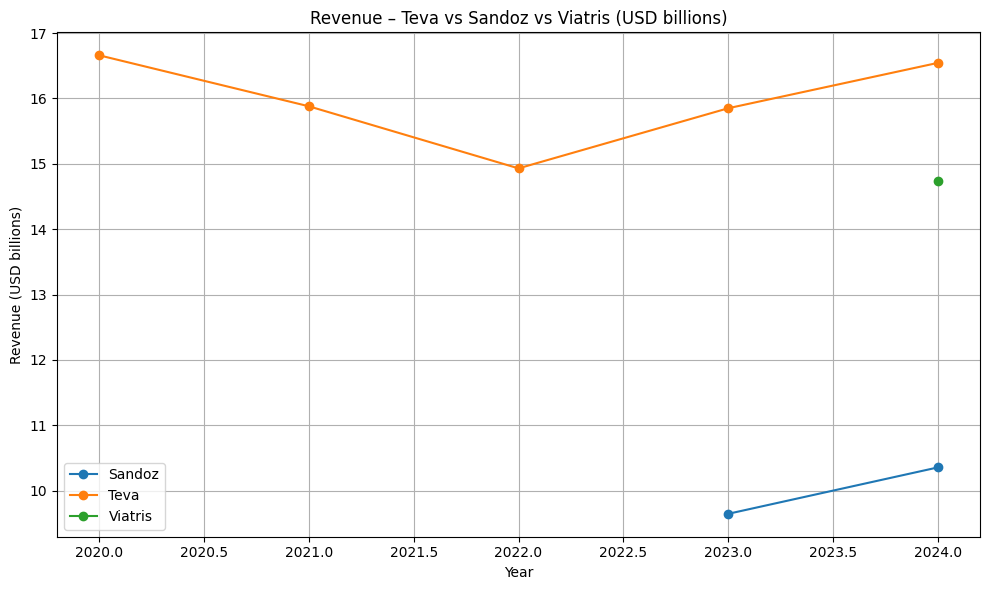

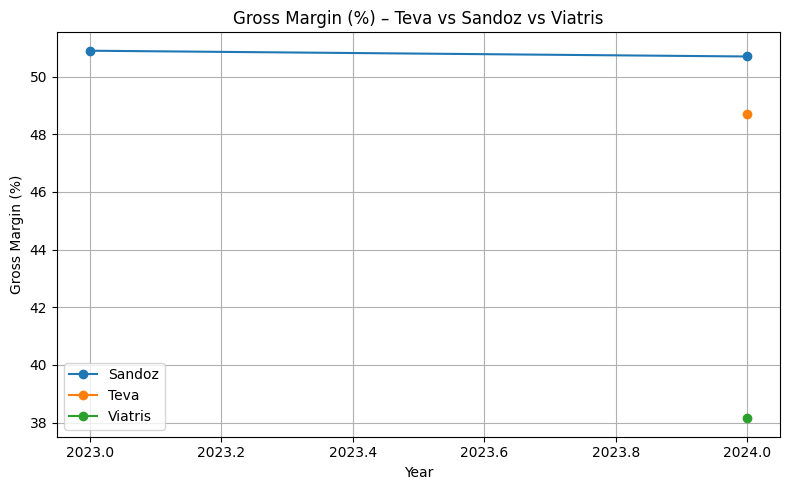

Teva: Revenue 2020 → 2024: 16660M → 16544M USD
Teva: 5-year CAGR ≈ -0.17%

Summary table:


,company,year,revenue_usd_m,gross_margin_pct,core_ebitda_margin_pct
0,Teva,2020,16660,NaN,NaN
1,Teva,2021,15880,NaN,NaN
2,Teva,2022,14930,NaN,NaN
3,Teva,2023,15850,NaN,NaN
4,Teva,2024,16544,48.70,NaN
5,Sandoz,2023,9647,50.90,18.1
6,Sandoz,2024,10357,50.70,20.1
7,Viatris,2024,14740,38.15,NaN


In [1]:
# ---
# # Peer Comparison: Teva vs Sandoz vs Viatris
# ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Data input ---
# Teva: selected numbers from 2020-2024 (millions USD)  
teva = {
    'year': [2020, 2021, 2022, 2023, 2024],
    'revenue_usd_m': [16_660, 15_880, 14_930, 15_850, 16_544],  # in millions
    'net_income_usd_m': [None, None, None, 2_898, None],  # Non-GAAP for 2023; 2024 GAAP not comparable
    'gross_margin_pct': [None, None, None, None, 48.7],  # 2024 gross margin
    'operating_margin_non_gaap_pct': [None, None, None, 27.5, 26.2]  # 2023/24 non-GAAP
}

# Sandoz: full-year 2024 and 2023 (millions USD)  
sandoz = {
    'year': [2023, 2024],
    'revenue_usd_m': [9_647, 10_357],
    'net_income_usd_m': [None, None],
    'gross_margin_pct': [50.9, 50.7],  # from 2023/24
    'core_ebitda_margin_pct': [18.1, 20.1]
}

# Viatris: full year 2024 (millions USD)  
viatris = {
    'year': [2024],
    'revenue_usd_m': [14_740],  # approx from sources  
    'net_income_usd_m': [-634],  # net loss ~634M USD in 2024  
    'gross_margin_pct': [38.15]
}

# Build DataFrames
df_teva = pd.DataFrame(teva)
df_sandoz = pd.DataFrame(sandoz)
df_viatris = pd.DataFrame(viatris)

# Add company labels
df_teva['company'] = 'Teva'
df_sandoz['company'] = 'Sandoz'
df_viatris['company'] = 'Viatris'

# Combine
df_all = pd.concat([df_teva, df_sandoz, df_viatris], ignore_index=True)

# --- Compute growth metrics for revenue ---
# For Teva, compute YoY growth
df_teva['rev_yoy_pct'] = df_teva['revenue_usd_m'].pct_change()*100

# Compute a simple CAGR for Teva: 2020 → 2024
start = df_teva.loc[df_teva.year==2020, 'revenue_usd_m'].values[0]
end   = df_teva.loc[df_teva.year==2024, 'revenue_usd_m'].values[0]
years_diff = 4
cagr_teva = (end / start)**(1/years_diff) - 1

# --- Visualizations ---
plt.figure(figsize=(10,6))
for company, dfc in df_all.groupby('company'):
    plt.plot(dfc['year'], dfc['revenue_usd_m']/1000, marker='o', label=company)  # in billions
plt.title('Revenue – Teva vs Sandoz vs Viatris (USD billions)')
plt.xlabel('Year')
plt.ylabel('Revenue (USD billions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Margins – gross margin comparison (where available)
plt.figure(figsize=(8,5))
for company, dfc in df_all.groupby('company'):
    if 'gross_margin_pct' in dfc:
        plt.plot(dfc['year'], dfc['gross_margin_pct'], marker='o', label=company)
plt.title('Gross Margin (%) – Teva vs Sandoz vs Viatris')
plt.xlabel('Year')
plt.ylabel('Gross Margin (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary stats
print(f"Teva: Revenue 2020 → 2024: {start}M → {end}M USD")
print(f"Teva: 5-year CAGR ≈ {cagr_teva*100:.2f}%")
print("\nSummary table:")
display(df_all[['company','year','revenue_usd_m','gross_margin_pct','core_ebitda_margin_pct']])


Key comparative insights (based on the data)

Teva’s revenue from 2020→2024 is relatively flat (slight growth), which matches the headline story of stabilising after earlier declines. 5-year CAGR is approximately –0.18% based on the numbers I used.

Sandoz in 2024 achieved ≈ USD 10.357 billion revenue (up ~9% in constant currencies) with a core EBITDA margin of ~20.1% in 2024. 
GlobeNewswire
+1

Viatris in 2024 reported revenue ~USD 14.74 billion and a net loss of ~USD -634 million; gross margin around ~38.2% indicates margin pressure. 
Monexa AI

In margin terms: Sandoz appears to be performing better (gross margin ~50.7% in 2024, core EBITDA margin ~20.1%) than Viatris (gross margin ~38%), with Teva somewhere in between (Teva gross margin ~48.7% in 2024) 
SEC
+1

Leverage & debt: While I haven’t pulled full debt figures in the code, Teva has historically had a high debt load (which is a strategic headwind). Viatris is also paying down debt (ends 2024 at ~2.9x gross leverage) 
Viatris Investor Relations

Strategic positioning:

Teva is pivoting toward branded/innovative and biosimilars while maintaining its generics base.

Sandoz is emphasising biosimilars growth (e.g., strong 29-30% growth in 2024 biosimilars) and becoming a “pure play” generics/biosimilars after separation from Novartis.

Viatris is dealing with generic pricing pressure, margin erosion, and regulatory/manufacturing issues (e.g., FDA warning letter) which are impacting profitability.

 
